## Data Transformation and Preprocessing for Bank Marketing Dataset
dataset source: https://archive.ics.uci.edu/dataset/222/bank+marketing

This notebook provides a detailed exploration of the data and walks through the decision-making process for replacing missing values and normalizing the data prior to machine learning.

In [2]:
#Import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Download data from UCI ML Repo via fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
X.head()
#NB: The loaded datasets are pandas dataframes with the value 'unknown' replace with 'NaN'.
#Also, this downloads the older version of the dataset with 17 features as opposed to 20

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [4]:
#Combine X and y so labels are removed with samples
X['label'] = y
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,label
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### Check for Missing Values in Each Feature

In [5]:
print("Dataset length: %d"%len(X))
print("Number of missing values in each feature:")
for col in X.columns:
    print(col, sum(X[col].isna()))

Dataset length: 45211
Number of missing values in each feature:
age 0
job 288
marital 0
education 1857
default 0
balance 0
housing 0
loan 0
contact 13020
day_of_week 0
month 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 36959
label 0


In [6]:
## Build functions to look at categories in an individual feature

def how_many_categories(feature, df):
    cats = set(df[feature])
    print("Number of categories: %d"%len(cats))
    print("Categories:")
    print(cats)
    return(list(cats))

def plot_categories(feature, cat_list, df):
    counts = []
    for cat in cat_list:
        counts.append(len(df[df[feature]==cat]))
    xcoords = [i for i in range(len(counts))]
    plt.bar(x=xcoords, height=counts)
    plt.xticks(ticks=xcoords, labels=cat_list)
    plt.tick_params(axis='x', labelrotation=90.0)
    plt.ylabel("count")
    plt.title("Categories in %s"%feature)
    plt.show()

Number of categories: 12
Categories:
{'services', 'entrepreneur', 'unemployed', 'blue-collar', 'management', nan, 'admin.', 'self-employed', 'student', 'retired', 'housemaid', 'technician'}


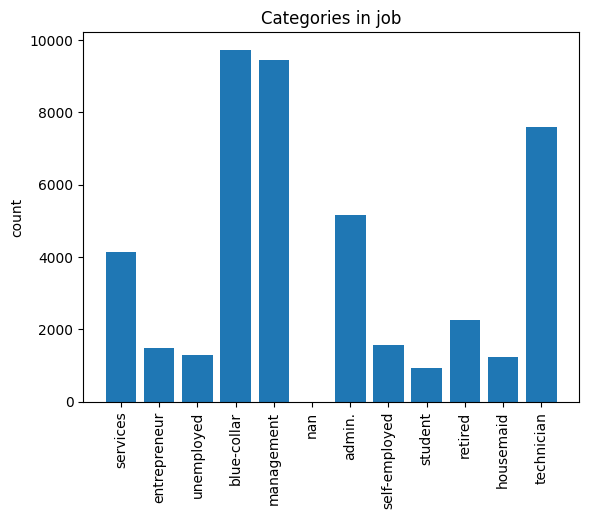

In [7]:
# Look at jobs feature
job_cats = how_many_categories('job',X)
plot_categories('job', job_cats, X)

There are 12 categories of job in this dataset. There are a total of 45,211 samples, 288 of which are missing data for job. Options:
- Remove samples with nan for job. There aren't many of them.
- Allow nan to be a category of job. Again, there aren't many of them, so hopefully it won't have a huge effect but would allow the keeping of the sample.
- Impute with the most common job type
- Impute with 'unemployed' or 'retired' since those are the most likely cases where the value would be input as null

No one job category is much more prevalent than the others. It does not make sense to replace missing values with the majority class. Since it isn't clear whether 'retired' or 'unemployed' is the better replacement option, I'm opting to delete samples without a job category.

In [8]:
print(len(X))
X.dropna(subset='job', inplace=True)
print(len(X))


45211
44923


Number of categories: 4
Categories:
{nan, 'secondary', 'primary', 'tertiary'}


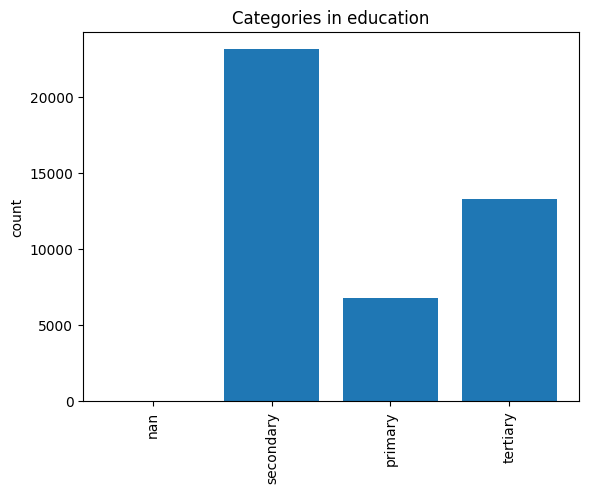

In [9]:
## Look at education
education_cats = how_many_categories('education',X)
plot_categories('education', education_cats, X)

Here 1,857 samples are missing values, so removing samples with missing values would remove a lot of data. It seems reasonable to replace NaNs in this column with 'secondary', since this is the most common category and is a reasonable compromise between the other two options.

In [10]:
X['education'] = X['education'].fillna("secondary")

Number of categories: 3
Categories:
{'cellular', nan, 'telephone'}


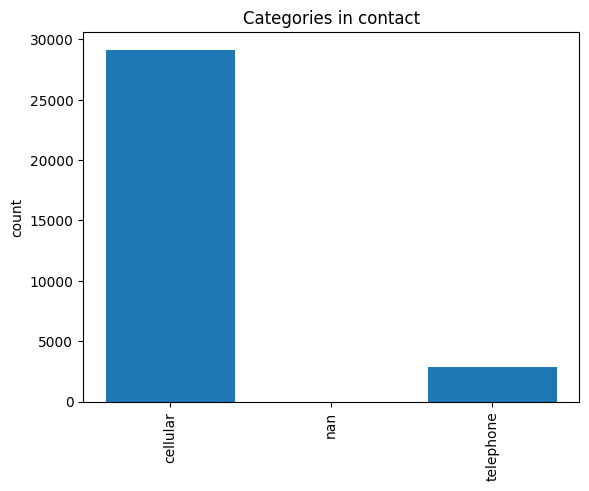

In [11]:
##Look at contact method
contact_cats = how_many_categories('contact',X)
plot_categories('contact', contact_cats, X)

I think we can assume from the nature of this dataset that all customers were contacted. Therefore, it makes sense to replace nan values with 'cellular', the majority class.

In [12]:
X['contact'] = X['contact'].fillna("cellular")

Number of categories: 4
Categories:
{'failure', 'other', nan, 'success'}


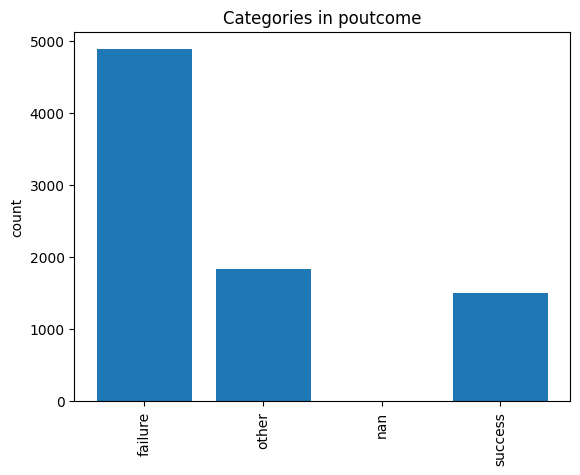

In [13]:
#Look at poutcome
poutcome_cats = how_many_categories('poutcome',X)
plot_categories('poutcome', poutcome_cats, X)

There are 36,959 samples with NaN for poutcome (the outcome of a previous marketing campaign for this customer), making NaN the majority class. It may make sense to ignore this feature entirely. If we're going to replace NaN with a value, 'other' seems reasonable. 

In [14]:
X['poutcome'] = X['poutcome'].fillna("other")

In [15]:
#Double check all NaNs were removed
print("Dataset shape: ", X.shape)
print("Number of missing values in each feature:")
for col in X.columns:
    print(col, sum(X[col].isna()))

Dataset shape:  (44923, 17)
Number of missing values in each feature:
age 0
job 0
marital 0
education 0
default 0
balance 0
housing 0
loan 0
contact 0
day_of_week 0
month 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
label 0


#### Removing 'duration' feature
The feature 'duration' will be deleted from consideration following this note uploaded with the dataset to the UCI repository:

"Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model."

In [16]:
X.drop(columns='duration', inplace=True)

### Train-test split

Training and test data will be encoded and normalized separately to better mirror a real-world scenario. Ideally, we would keep the data sorted by date, as it is, and split off the bottom chunk for use as a test set, to mimic a situation in which past data is used to predict future occurrences. However, doing so results in training data with 6% positive examples and test data with 47% positive examples, which is not conducive to model training and evaluation. Perhaps some marketing strategies changed later on in the data gathering period, resulting in better success rates towards the end of the period. It is unreasonable to hope that the model will learn well when most of the positive examples are not available for training, so instead all samples are shuffled and randomly split into the train, validation, and test sets.

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

train, testval = train_test_split(X, test_size=0.2, shuffle=True) #change to false if want to use later datapoints as test set
val, test = train_test_split(testval, test_size=0.5, shuffle=True)

def split_and_save(df, name):
    y_subset = df['label'].replace({'no':0, 'yes':1})
    X_subset = df.drop(columns='label')
    y_subset.to_csv("y_%s.csv"%name, index=False)
    X_subset.to_csv("X_%s_nonorm.csv"%name, index=False)
    return(X_subset, y_subset)

X_train, y_train = split_and_save(train, "train")
X_val, y_val = split_and_save(val, "val")
X_test, y_test = split_and_save(test, "test")


/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/2994240890.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_subset = df['label'].replace({'no':0, 'yes':1})
/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/2994240890.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_subset = df['label'].replace({'no':0, 'yes':1})
/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/2994240890.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

### Data Normalization
The nonorm.csv datasets will be used for algorithms such as XGBoost that do not require normalization or categorical variable encoding. The following cells further process the datasets for algorithms such as neural networks that do require such transformations.

In [18]:
#Read in saved data from files if not already in memory
X_train = pd.read_csv("X_train_nonorm.csv")

##### One-Hot Encoding
Categorical variables with less than 20 categories will be one-hot encoded. That includes job, marital, poutcome, default, housing, loan, and contact. Categorical variables with only two categories will be encoded as a single feature each (binary encoded).

In [19]:
from sklearn.preprocessing import OneHotEncoder
categorical_vars = ['job', 'marital', 'poutcome', 'default', 'housing','loan','contact']
oh_encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
oh_encoder.fit(X_train[categorical_vars])
oh_encoded = oh_encoder.transform(X_train[categorical_vars])
ohe_df = pd.DataFrame(oh_encoded, columns=oh_encoder.get_feature_names_out())
ohe_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,default_yes,housing_yes,loan_yes,contact_telephone
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Looks good. Replace values in X_train:
X_train.drop(columns=categorical_vars, inplace=True)
ohe_df.set_index(X_train.index)
X_train = pd.merge(X_train, ohe_df, left_index=True, right_index=True)

##### Education
It makes sense to ordinal encode education, since there are three sequential levels to it.


In [21]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc_dict = {'primary':1, 'secondary':2, 'tertiary':3}
education_encoded = [ordinal_enc_dict[X_train['education'].iloc[i]] for i in range(len(X_train))]
X_train['education'] = education_encoded


The remaining features require some investigation to determine the best treatment:

##### Age
Age should be relatively uniformly distributed, in which case min-max scaling to bring it into the range of (0,1) makes sense. 

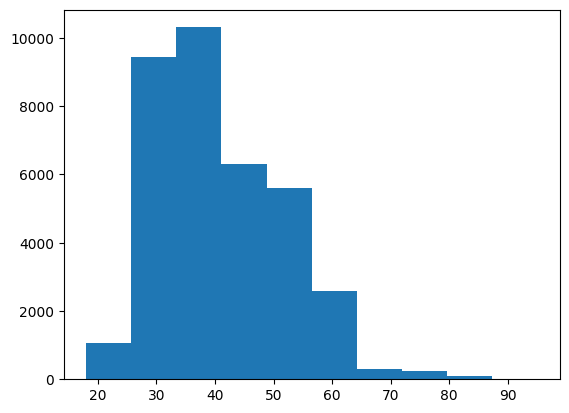

In [22]:
#Check age distribution in X_train
plt.hist(X_train['age'])
plt.show()

Well, that doesn't look uniform, but it doesn't look normal either. Since min-max scaling is generally advised for age integers, we will move forward with it anyway. We will save the min and max values from the training set for use in normalizing the validation and test sets.

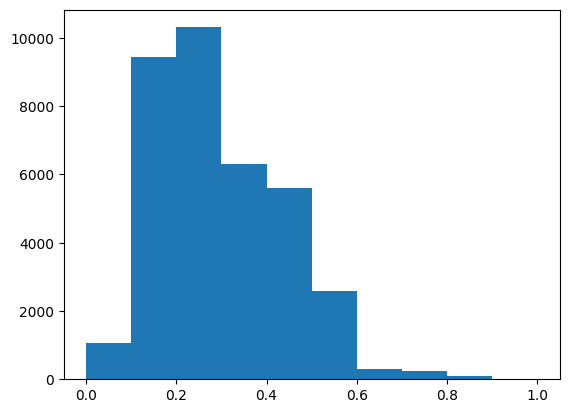

In [23]:
age_min = np.min(X_train['age'])
age_max = np.max(X_train['age'])
age_scaled = (X_train['age'] - age_min)/(age_max - age_min)

#Check scaled data looks right before updating X_train
plt.hist(age_scaled)
plt.show()

In [24]:
#It looks fine. Update:
X_train['age'] = age_scaled

##### Balance
definition: average yearly balance (for the customer?)

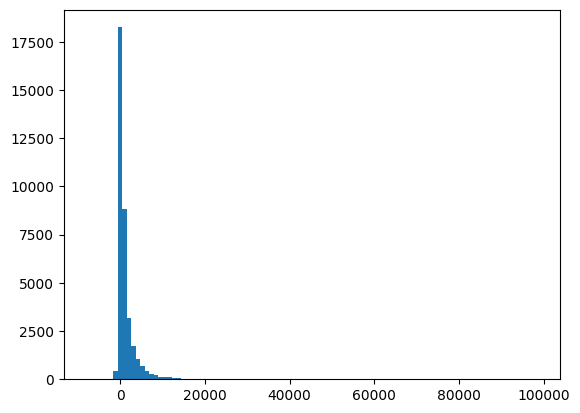

In [25]:
#First check distribution
plt.hist(X_train['balance'], bins=100)
plt.show()

The majority of balances are 0, with a handful below 0 and some skew above 0. Since the data distribution is already cented around 0, I'm going to use standardization.

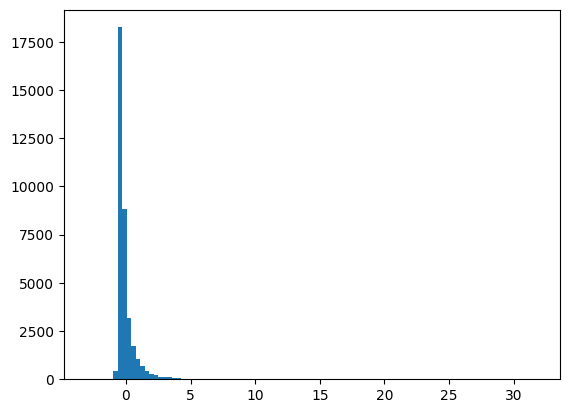

In [26]:
balance_mean = np.mean(X_train['balance'])
balance_std = np.std(X_train['balance'])
balance_scaled = (X_train['balance'] - balance_mean)/balance_std
plt.hist(balance_scaled, bins=100)
plt.show()

New data is in smaller range but is still very skewed. There are not many samples with a scaled balance > 5. It seems reasonable to replace any values >5 with 5 to avoid issues with large numbers.


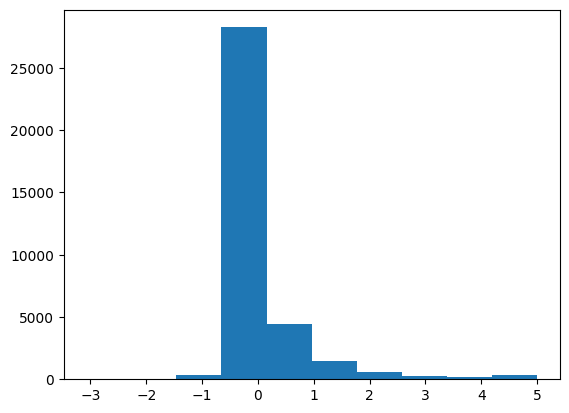

In [27]:
balance_scaled_masked = pd.DataFrame(balance_scaled).mask(balance_scaled > 5, 5)
plt.hist(balance_scaled_masked)
plt.show()

In [28]:
#Looks ok to me. Let's set it.
X_train['balance'] = balance_scaled_masked

##### Time Features
Day_of_week and month are both time-based features, which are best encoded using RBF scaling. The day_of_week feature ranges from 1 to 31 and appears to actually be the day of the month, not the day of the week.

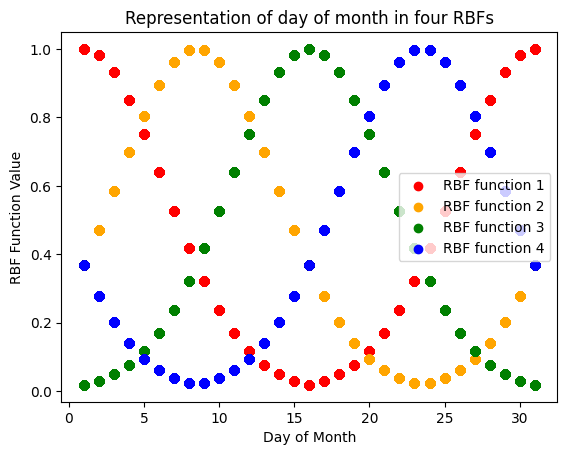

In [29]:
from sklego.preprocessing import RepeatingBasisFunction

rbf_day = RepeatingBasisFunction(n_periods=4, column='day_of_week', input_range=(1,31))
day_of_week_transformed = np.array(rbf_day.fit_transform(X_train))

plt.scatter(x=X_train['day_of_week'], y=day_of_week_transformed[:,0], color='red', label="RBF function 1")
plt.scatter(x=X_train['day_of_week'], y=day_of_week_transformed[:,1], color='orange', label="RBF function 2")
plt.scatter(x=X_train['day_of_week'], y=day_of_week_transformed[:,2], color='green', label="RBF function 3")
plt.scatter(x=X_train['day_of_week'], y=day_of_week_transformed[:,3], color='blue', label="RBF function 4")
plt.xlabel("Day of Month")
plt.ylabel("RBF Function Value")
plt.legend()
plt.title("Representation of day of month in four RBFs")
plt.show()


With the RBF transformation, day_of_week has been transformed from a single value ranging from 1 to 31 to four values, each ranging from 0 to 1, the combination of which indicates where the date falls in the cycle of a month. This enables day 1 to look similar to both day 2 and day 31.

In [30]:
#Update X_train
X_train.drop(columns='day_of_week',inplace=True)
X_train['day_of_month_rbf1'] = day_of_week_transformed[:,0]
X_train['day_of_month_rbf2'] = day_of_week_transformed[:,1]
X_train['day_of_month_rbf3'] = day_of_week_transformed[:,2]
X_train['day_of_month_rbf4'] = day_of_week_transformed[:,3]


In [31]:
#Same for months, but first need to ordinal encode them from strings
month_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
              'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
X_train['month'] = X_train['month'].replace(month_dict)

rbf_month = RepeatingBasisFunction(n_periods=4, input_range=(1,12), column="month")
month_transformed = np.array(rbf_month.fit_transform(X_train))

X_train.drop(columns='month',inplace=True)
X_train['month_rbf1'] = month_transformed[:,0]
X_train['month_rbf2'] = month_transformed[:,1]
X_train['month_rbf3'] = month_transformed[:,2]
X_train['month_rbf4'] = month_transformed[:,3]


/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/3027142515.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['month'] = X_train['month'].replace(month_dict)


##### Campaign
definition: the number of contacts performed during this campaign for this client

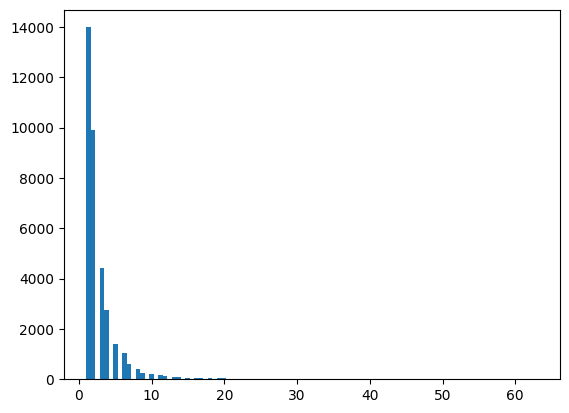

In [32]:
plt.hist(X_train['campaign'],bins=100)
plt.show()

This feature looks like it follows a Poisson distribution with lambda=1, which is not unusual for count data such as this. A log transformation might be reasonable to reduce the spread of the data, especially as no value is less than 1.

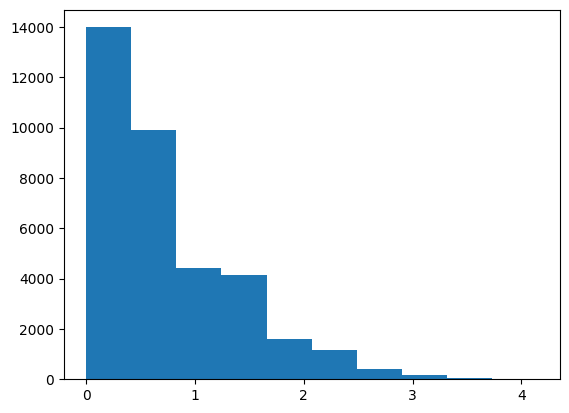

In [33]:
#Transform and visualize
camp_log = np.log(X_train['campaign'].to_list())
plt.hist(camp_log)
plt.show()

In [34]:
#It looks ok. Update X_train.
X_train['campaign'] = camp_log

##### Pdays
definition: number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)

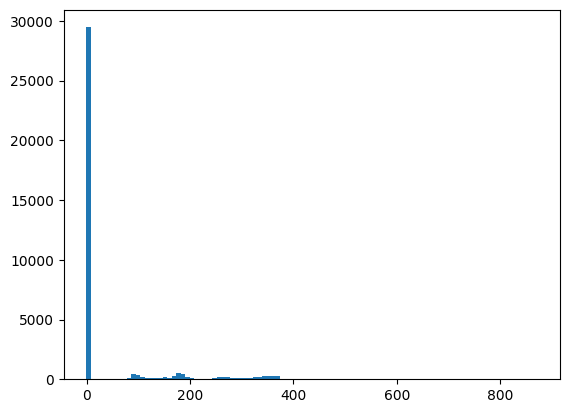

In [35]:
#Check out the distribution
plt.hist(X_train['pdays'], bins=100)
plt.show()

In [36]:
print("Number of samples with pdays<0: ", len(X_train[X_train['pdays']<0]))
print("Number of samples with pdays>0: ", len(X_train[X_train['pdays']>0]))

Number of samples with pdays<0:  29388
Number of samples with pdays>0:  6550


The majority of samples have pdays=-1 (client not previously contacted). Could do a binary encoding, where pdays=1 if client has been contacted before, else 0. This would throw away potentially helpful information--the length of time since last contact does probably impact customer sign-up. Standardization might be the best call, because it will keep the negative examples negative while reducing the range of the feature.

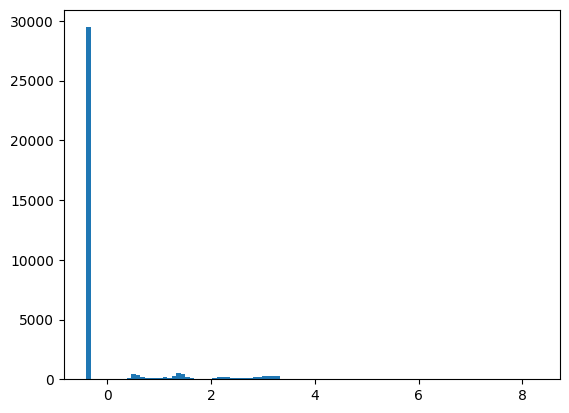

In [37]:
pdays_mean = np.mean(X_train['pdays'])
pdays_std = np.std(X_train['pdays'])
pdays_normed = (X_train['pdays'] - pdays_mean)/pdays_std
plt.hist(pdays_normed, bins=100)
plt.show()

In [38]:
#Check that have same number of negative samples in un-transformed and transformed data
print(len(X_train[X_train['pdays']<0]))
print(sum(pdays_normed < 0))


29388
29570


In [39]:
#let's do it.
X_train['pdays'] = pdays_normed

##### Previous
definition: number of contacts performed before this campaign for this client

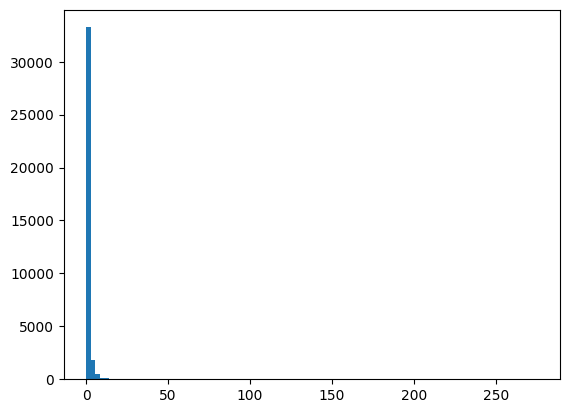

In [40]:
#Check out the distribution
plt.hist(X_train['previous'], bins=100)
plt.show()

In [41]:
print("Number of samples with previous=0: ", len(X_train[X_train['previous']==0]))
print("Number of samples with previous=1: ", len(X_train[X_train['previous']==1]))
print("Number of samples with previous>1: ", len(X_train[X_train['previous']>1]))

Number of samples with previous=0:  29388
Number of samples with previous=1:  2198
Number of samples with previous>1:  4352


Again, most of the samples have a value of zero. We could switch this to a binary encoding, or do standardization, or do binning to create an ordinal encoding.

29388


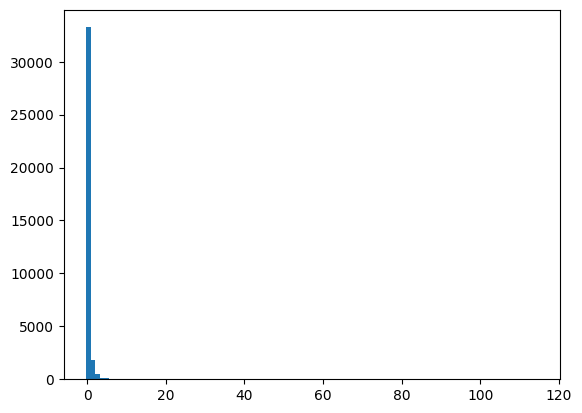

In [42]:
#Try standardization
prev_mean = np.mean(X_train['previous'])
prev_std = np.std(X_train['previous'])
prev_normed = (X_train['previous'] - prev_mean)/prev_std
print(sum(prev_normed < 0))
plt.hist(prev_normed, bins=100)
plt.show()

The range is still much to wide for this feature. Let's do ordinal encoding. It seems fairly reasonable to do 0, 1, and 2, where 2 replaces any value greater than 1.

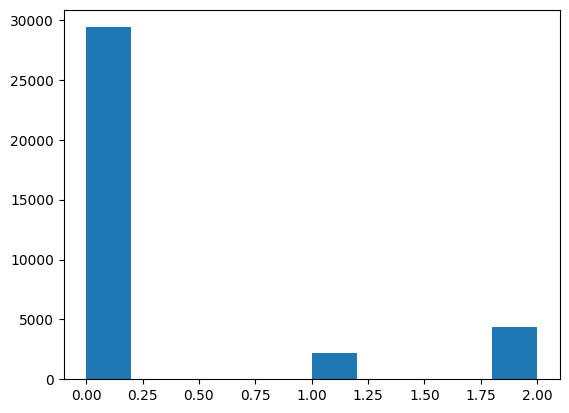

In [43]:
prev_ordinal = X_train['previous'].mask(X_train['previous']>1, 2)
X_train['previous'] = prev_ordinal
plt.hist(X_train['previous'])
plt.show()

In [44]:
#Double check everything in X_train looks good
X_train.head()

,age,education,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_telephone,day_of_month_rbf1,day_of_month_rbf2,day_of_month_rbf3,day_of_month_rbf4,month_rbf1,month_rbf2,month_rbf3,month_rbf4
0,0.415584,3,-0.448813,1.386294,-0.409938,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.236928,0.039164,0.527292,0.960789,0.120549,0.091774,0.742657,0.813336
1,0.233766,3,-0.242308,0.000000,-0.409938,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.982379,0.471842,0.030671,0.276804,0.876138,0.667004,0.068722,0.155750
2,0.181818,2,-0.435374,1.386294,1.464033,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.931358,0.584045,0.049566,0.201001,0.876138,0.667004,0.068722,0.155750
3,0.129870,3,-0.441602,1.098612,-0.409938,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.367879,0.018316,0.367879,0.036670,0.247414,0.967483,0.512005
4,0.272727,2,-0.088577,1.791759,-0.409938,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.931358,0.201001,0.049566,0.584045,0.120549,0.813336,0.742657,0.091774


### Apply Processing to Validation and Test Sets

In [45]:
def encode_and_normalize(df):

    """Uses several variables defined in cells above. Is not usable without running previous cells."""

    #one-hot and binary encoding
    categorical_vars = ['job', 'marital', 'poutcome', 'default', 'housing','loan','contact']
    oh_encoded = oh_encoder.transform(df[categorical_vars]) #need to find way to save this if want code to be reusable
    ohe_df = pd.DataFrame(oh_encoded, columns=oh_encoder.get_feature_names_out())
    df.drop(columns=categorical_vars, inplace=True)
    ohe_df.set_index(df.index)
    df = pd.merge(df, ohe_df, left_index=True, right_index=True)

    #ordinal encoding for education
    df['education'] = [ordinal_enc_dict[df['education'].iloc[i]] for i in range(len(df))]

    #min-max scaling for age
    df['age'] = (df['age'] - age_min)/(age_max - age_min)

    #standardization for balance
    balance_scaled = (df['balance'] - balance_mean)/balance_std #may want to standardize with mean and sd of val/test dataset instead
    balance_scaled_masked = pd.DataFrame(balance_scaled).mask(balance_scaled > 5, 5)
    df['balance'] = balance_scaled_masked

    #rbf encoding for time features
    rbf_day = RepeatingBasisFunction(n_periods=4, column='day_of_week', input_range=(1,31))
    day_of_week_transformed = np.array(rbf_day.fit_transform(df))
    df.drop(columns='day_of_week',inplace=True)
    df['day_of_month_rbf1'] = day_of_week_transformed[:,0]
    df['day_of_month_rbf2'] = day_of_week_transformed[:,1]
    df['day_of_month_rbf3'] = day_of_week_transformed[:,2]
    df['day_of_month_rbf4'] = day_of_week_transformed[:,3]

    rbf_month = RepeatingBasisFunction(n_periods=4, column='month', input_range=(1,12))
    df['month'] = df['month'].replace(month_dict)
    month_transformed = np.array(rbf_month.fit_transform(df))
    df.drop(columns='month',inplace=True)
    df['month_rbf1'] = month_transformed[:,0]
    df['month_rbf2'] = month_transformed[:,1]
    df['month_rbf3'] = month_transformed[:,2]
    df['month_rbf4'] = month_transformed[:,3]

    #log transform campaign
    df['campaign'] = np.log(df['campaign'].to_list())

    #standardize pdays
    df['pdays'] = (df['pdays'] - pdays_mean)/pdays_std #may want to use mean and sd of test/val dataset instead

    #ordinal encode previous
    df['previous'] = df['previous'].mask(df['previous']>1, 2)

    return(df)

In [46]:
X_val = pd.read_csv("X_val_nonorm.csv")
X_test = pd.read_csv("X_test_nonorm.csv")

X_val_normed = encode_and_normalize(X_val)
X_test_normed = encode_and_normalize(X_test)

X_val_normed.head()

/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/4035820494.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace(month_dict)
/var/folders/sk/_mw52g314ps5mcv8jqdlynjc0000gn/T/ipykernel_5007/4035820494.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace(month_dict)


,age,education,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,loan_yes,contact_telephone,day_of_month_rbf1,day_of_month_rbf2,day_of_month_rbf3,day_of_month_rbf4,month_rbf1,month_rbf2,month_rbf3,month_rbf4
0,0.324675,1,-0.241652,0.693147,-0.409938,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.030671,0.471842,0.982379,0.276804,0.120549,0.813336,0.742657,0.091774
1,0.298701,2,-0.288854,0.000000,-0.409938,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.169013,0.062177,0.641180,0.894839,0.876138,0.155750,0.068722,0.667004
2,0.350649,2,0.869541,1.098612,-0.409938,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.931358,0.201001,0.049566,0.584045,1.000000,0.367879,0.018316,0.367879
3,0.220779,2,-0.396367,0.000000,-0.409938,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.018316,0.367879,1.000000,0.367879,0.304196,0.991770,0.437602,0.026131
4,0.259740,3,1.445460,1.098612,-0.409938,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.320531,0.023807,0.418486,0.995565,0.120549,0.813336,0.742657,0.091774


In [47]:
#Save everything
X_train.to_csv("X_train_normed.csv", index=False)
X_val_normed.to_csv("X_val_normed.csv", index=False)
X_test_normed.to_csv("X_test_normed.csv", index=False)


### Create Synthetic Minority Class Samples
The dataset is approximately 11% positive examples. The following code blocks use SMOTENC to create synthetic positive examples to optionally add to X_train_nonorm and X_train_normed.

In [48]:
#For normed and encoded data
from imblearn.over_sampling import SMOTENC

X_train_normed = pd.read_csv("X_train_normed.csv")
y_train = pd.read_csv("y_train.csv")

feat_list = list(oh_encoder.get_feature_names_out())
sm1 = SMOTENC(categorical_features=feat_list,
             sampling_strategy=0.5, #desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling; use 1.0 to get equal numbers
             random_state=42
             )
X_train_normed_resampled, y_train_normed_resampled = sm1.fit_resample(X=X_train_normed, y=y_train)

nnew = len(X_train_normed_resampled) - len(X_train_normed)
print("Number of new samples generated: {} ({:.0%} of all samples)".format(nnew, nnew/len(X_train_normed_resampled)))
numpos = sum(y_train_normed_resampled['label'])
oldnumpos = sum(y_train['label'])
print("Number of positive samples now in dataset: {} ({:.0%} of all samples)".format(numpos, numpos/len(y_train_normed_resampled)))
print("Synthetic samples make up {:.0%} of all positive samples".format((numpos-oldnumpos)/numpos))


Number of new samples generated: 11651 (24% of all samples)
Number of positive samples now in dataset: 15863 (33% of all samples)
Synthetic samples make up 73% of all positive samples


In [49]:
#For unencoded data
X_train_nonorm = pd.read_csv("X_train_nonorm.csv")

#change 'object' dtype to 'categorical' dtype for nonorm data
catcols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in catcols:
    X_train_nonorm[col] = X_train_nonorm[col].astype('category')

sm2 = SMOTENC(categorical_features='auto',
              sampling_strategy=0.5,
              random_state=42
              )
X_train_nonorm_resampled, y_train_nonorm_resampled = sm2.fit_resample(X=X_train_nonorm, y=y_train)

nnew = len(X_train_nonorm_resampled) - len(X_train_nonorm)
numpos = sum(y_train_nonorm_resampled['label'])
oldnumpos = sum(y_train['label'])
print("Number of new samples generated: {} ({:.0%} of all samples)".format(nnew, nnew/len(X_train_nonorm_resampled)))
print("Number of positive samples now in dataset: {} ({:.0%} of all samples)".format(numpos, numpos/len(y_train_nonorm_resampled)))
print("Synthetic samples make up {:.0%} of all positive samples".format((numpos-oldnumpos)/numpos))


Number of new samples generated: 11651 (24% of all samples)
Number of positive samples now in dataset: 15863 (33% of all samples)
Synthetic samples make up 73% of all positive samples


In [50]:
#Double-check that y_train_nonorm_resampled is the same as y_train_normed_resampled (used same random seed so should be true)
all(y_train_nonorm_resampled == y_train_normed_resampled)

True

In [ ]:
#Shuffle and save to files
from sklearn.utils import shuffle
X_train_nonorm_resampled, X_train_normed_resampled, y_train_normed_resampled = shuffle(X_train_nonorm_resampled, X_train_normed_resampled, y_train_normed_resampled, random_state=42)
X_train_nonorm_resampled.to_csv("X_train_nonorm_smoted.csv", index=False)
X_train_normed_resampled.to_csv("X_train_normed_smoted.csv", index=False)
y_train_normed_resampled.to_csv("y_train_smoted.csv", index=False)